In [35]:
import pandas as pd
import matplotlib
print(matplotlib.__version__)

3.9.2


In [37]:
df1 = pd.read_csv("gender_submission.csv")
df2 = pd.read_csv("test.csv")
df3 = pd.read_csv("train.csv")

In [63]:
df3.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,unknown,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,unknown,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,unknown,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,unknown,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,unknown,S


In [51]:
print(df3.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [ ]:
Describe infer
38% out of the training set survived the titanic from mean value
passenger age range 0.00 to 80 year old
outlier for the fare price between 75th per, standard deviation and max vlue 512. we might drop that value.

In [49]:
print("Summary for file1:")
print(df3.info())  


Summary for file1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [23]:
print("Summary for file1:") 
print(df3.value_counts)
#value count telling their are 891 rows 

Summary for file1:
<bound method DataFrame.value_counts of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..        

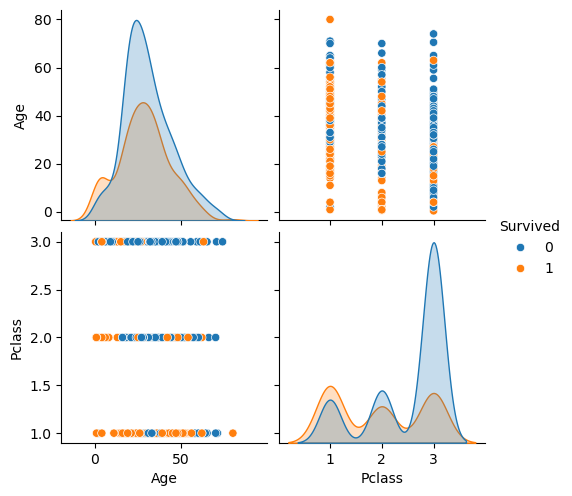

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df3[["Age", "Pclass", "Survived"]], hue="Survived")
plt.show()

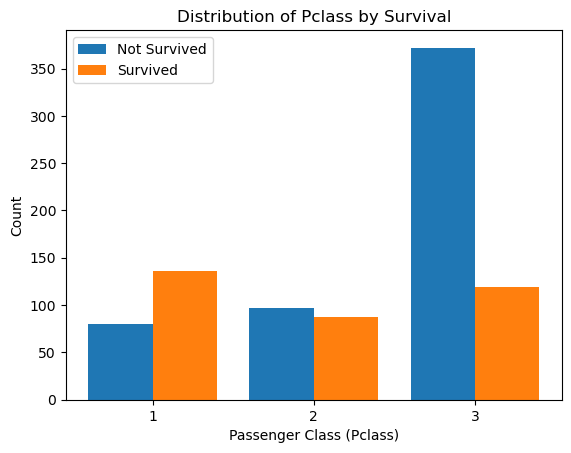

In [53]:
import matplotlib.pyplot as plt

plt.hist([df3[df3["Survived"]==0]["Pclass"], 
          df3[df3["Survived"]==1]["Pclass"]],
         bins=[0.5,1.5,2.5,3.5], 
         label=["Not Survived","Survived"], 
         rwidth=0.8)

plt.xticks([1,2,3])
plt.xlabel("Passenger Class (Pclass)")
plt.ylabel("Count")
plt.title("Distribution of Pclass by Survival")
plt.legend()
plt.show()

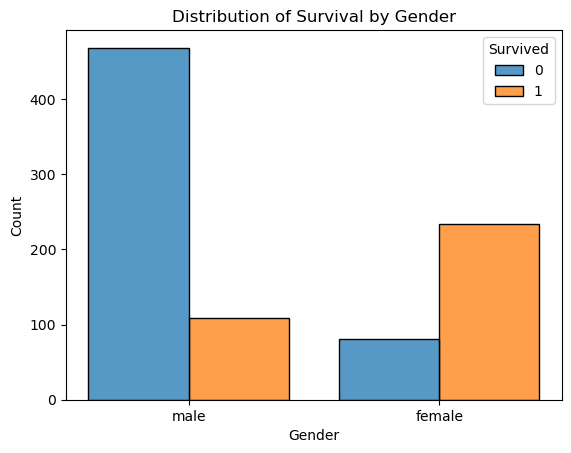

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df3, x="Sex", hue="Survived", multiple="dodge", shrink=0.8)

plt.title("Distribution of Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [55]:
result = df3.groupby("Sex").agg({
    "Survived": "mean",
    "Age": "mean",
    "Pclass": "mean",
    "Fare": "mean"
})
print(result)

        Survived        Age    Pclass       Fare
Sex                                             
female  0.742038  27.915709  2.159236  44.479818
male    0.188908  30.726645  2.389948  25.523893


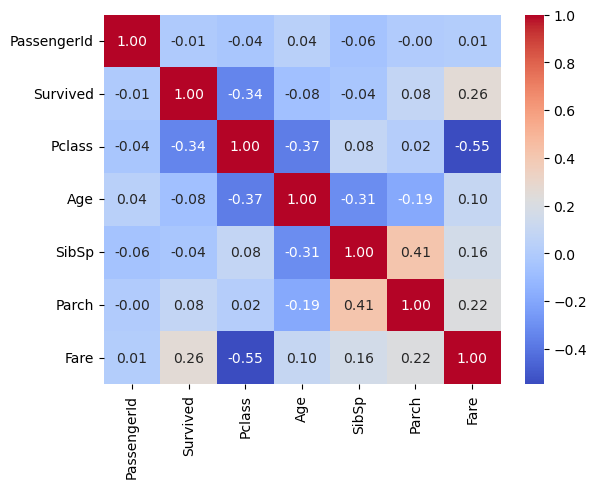

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr = df3.corr(numeric_only=True)   # only numeric columns

# Heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")

plt.show()

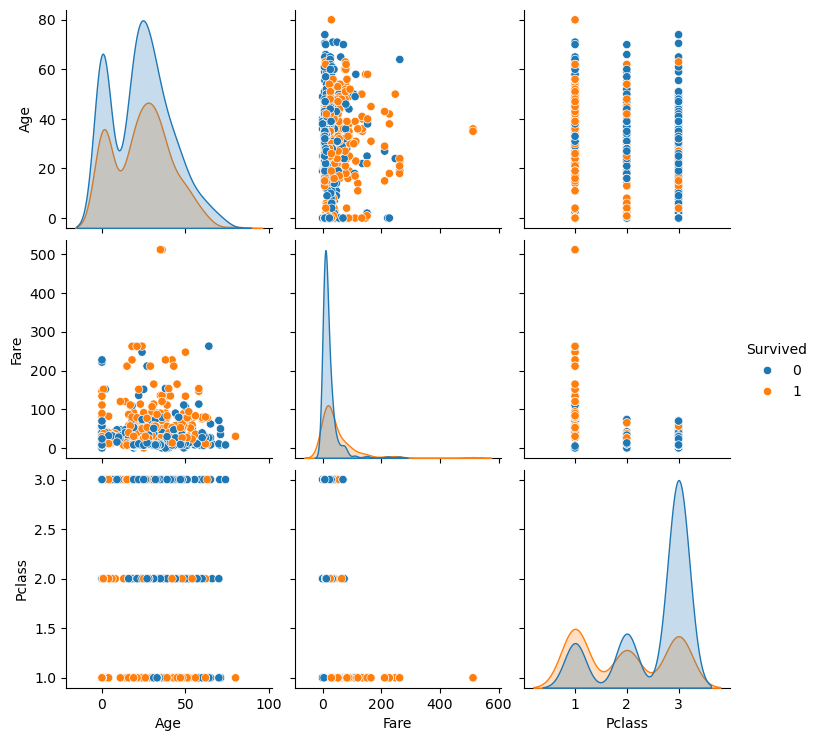

In [27]:
sns.pairplot(titanic[["Age", "Fare", "Pclass", "Survived"]], hue="Survived")
plt.show()

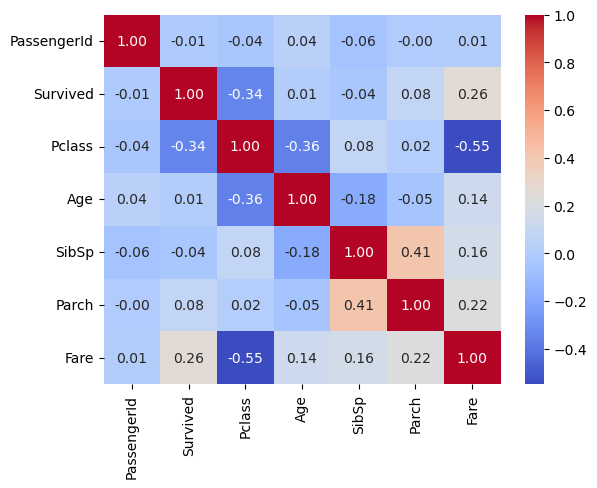

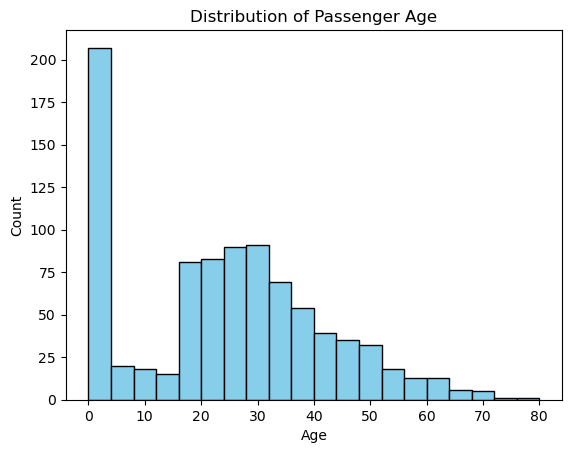

In [31]:
import matplotlib.pyplot as plt

plt.hist(titanic["Age"].dropna(), bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Passenger Age")
plt.show()

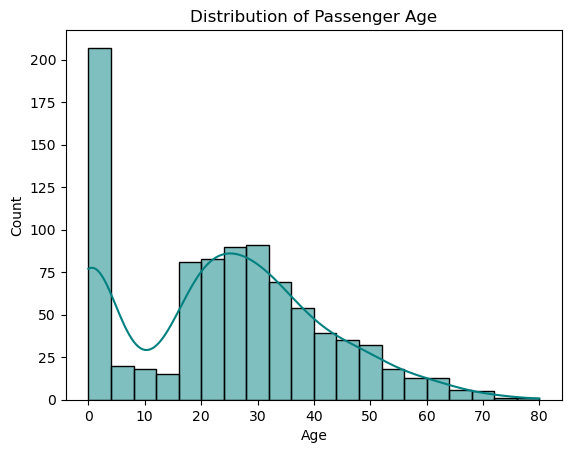

In [33]:
import seaborn as sns

sns.histplot(data=titanic, x="Age", bins=20, kde=True, color="teal")
plt.title("Distribution of Passenger Age")
plt.show()

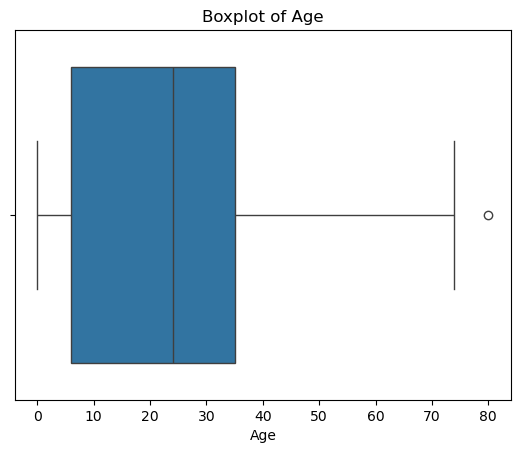

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=titanic["Age"])
plt.title("Boxplot of Age")
plt.show()


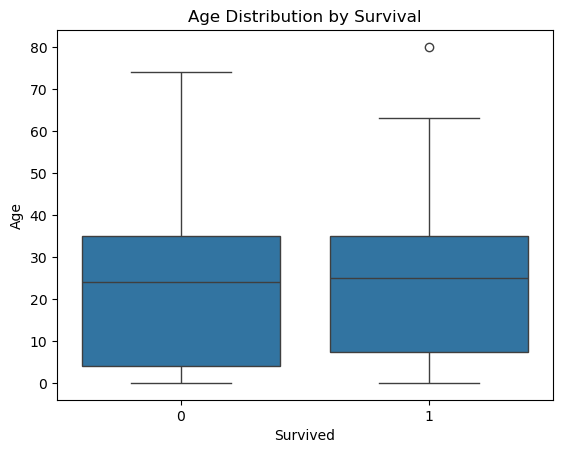

In [37]:
sns.boxplot(x="Survived", y="Age", data=titanic)
plt.title("Age Distribution by Survival")
plt.show()

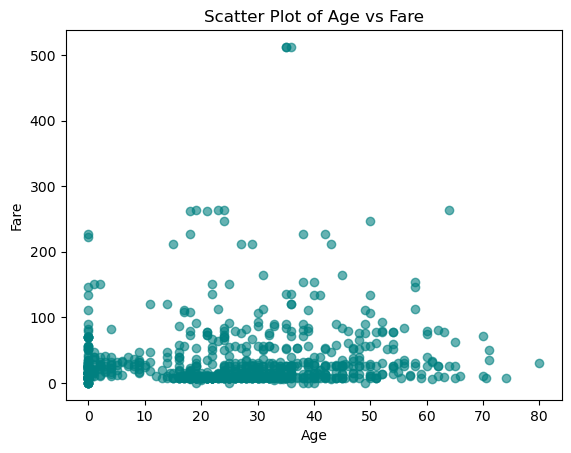

In [41]:
import matplotlib.pyplot as plt

plt.scatter(titanic["Age"], titanic["Fare"], alpha=0.6, color="teal")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Scatter Plot of Age vs Fare")
plt.show()

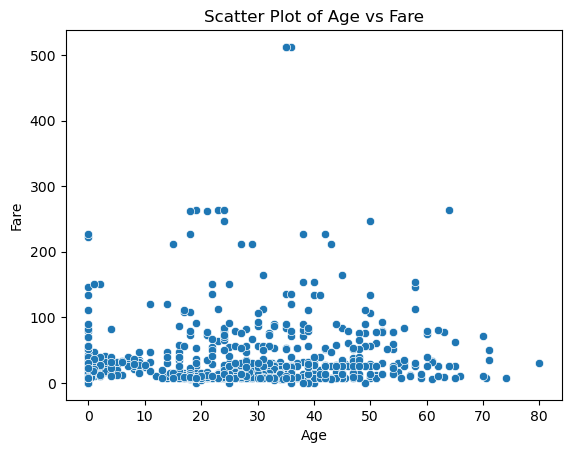

In [43]:
import seaborn as sns

sns.scatterplot(data=titanic, x="Age", y="Fare")
plt.title("Scatter Plot of Age vs Fare")
plt.show()

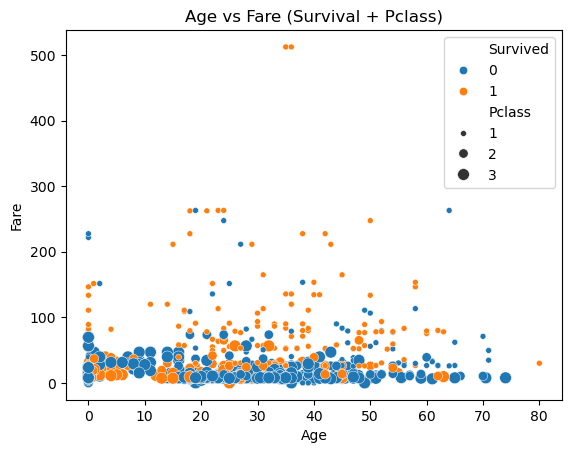

In [45]:
sns.scatterplot(data=titanic, x="Age", y="Fare", hue="Survived", size="Pclass")
plt.title("Age vs Fare (Survival + Pclass)")
plt.show()
